In [40]:
import warnings
warnings.filterwarnings('ignore')


#Import all required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style='darkgrid')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [84]:
#Read the individual datasets using pandas 

dfchurn = pd.read_csv(r"/Users/zayeedajibola/Downloads/archive-5/churn_data.csv")
dfcust = pd.read_csv(r"/Users/zayeedajibola/Downloads/archive-5/customer_data.csv")
dfinternet = pd.read_csv(r"/Users/zayeedajibola/Downloads/archive-5/internet_data.csv")

In [85]:
#Check for the first 5 records of the dataset

dfchurn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
#Check for the number of rows and columns

dfchurn.shape

(7042, 9)

In [89]:
#Check for the first 5 records of the dataset

dfcust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [90]:
#Check for the number of rows and columns

dfcust.shape

(7042, 5)

In [91]:
#Check for the first 5 records of the dataset

dfinternet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [92]:
#Check for the number of rows and columns

dfinternet.shape

(7042, 9)

In [93]:
#Merge the datasets together using "customerID"

df = pd.merge(dfchurn,dfcust, on="customerID")

In [94]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [95]:
df = pd.merge(df,dfinternet, on="customerID")

In [96]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [100]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7031 non-null   float64
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [102]:
df.isna().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
dtype: int64

In [113]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [114]:
df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

In [116]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [117]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
count,7042.000000,7042.000000,7042.000000,7042.000000
mean,32.366373,64.755886,2282.651714,0.162170
std,24.557955,30.088238,2264.508688,0.368633
min,0.000000,18.250000,18.800000,0.000000
25%,9.000000,35.500000,402.087500,0.000000
50%,29.000000,70.350000,1400.425000,0.000000
75%,55.000000,89.850000,3783.600000,0.000000
max,72.000000,118.750000,8684.800000,1.000000


In [70]:
df.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

<AxesSubplot:xlabel='tenure'>

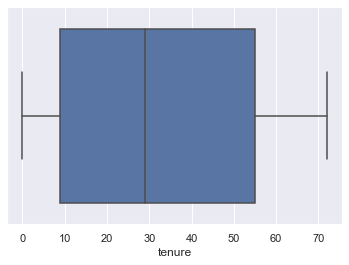

In [123]:
sns.boxplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

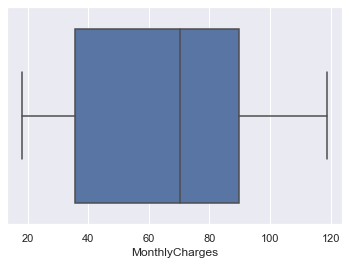

In [122]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

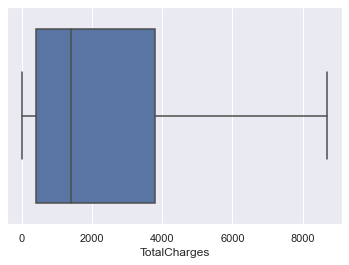

In [121]:
sns.boxplot(df['TotalCharges'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

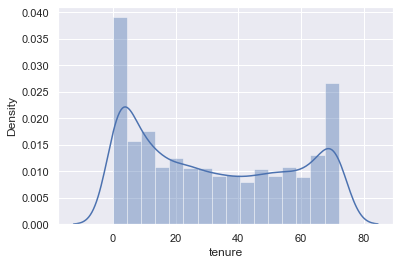

In [118]:
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

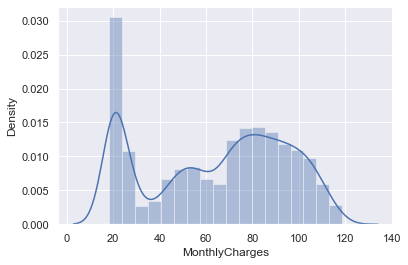

In [119]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

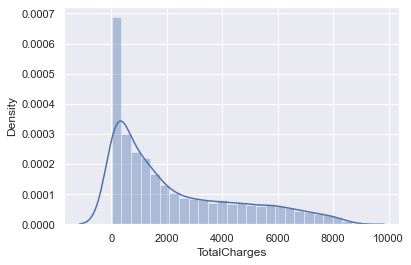

In [120]:
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

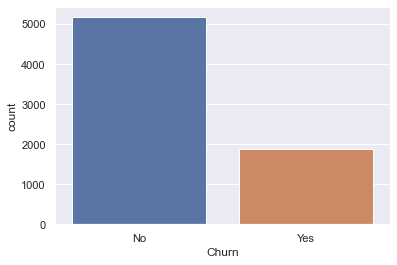

In [41]:
sns.countplot(df['Churn'])

In [288]:
df['Churn'].value_counts()

No     5173
Yes    1869
Name: Churn, dtype: int64

(100.0, 5000.0)

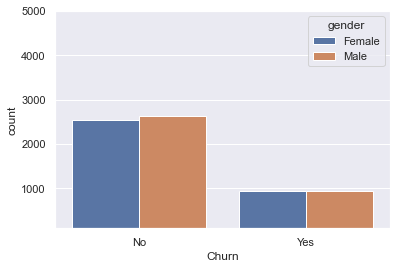

In [66]:
sns.countplot(df['Churn'], hue=df['gender'])
plt.ylim([100,5000])

<AxesSubplot:xlabel='Churn', ylabel='count'>

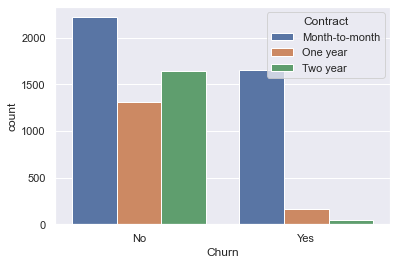

In [112]:
sns.countplot(df['Churn'], hue=df['Contract'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

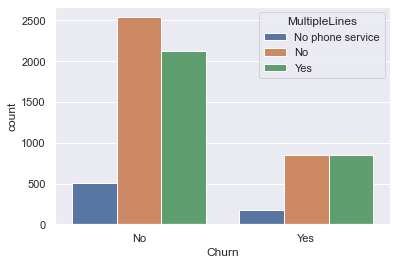

In [124]:
sns.countplot(df['Churn'], hue=df['MultipleLines'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

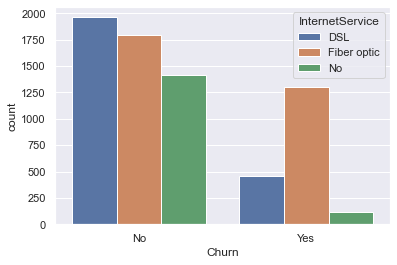

In [125]:
sns.countplot(df['Churn'], hue=df['InternetService'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

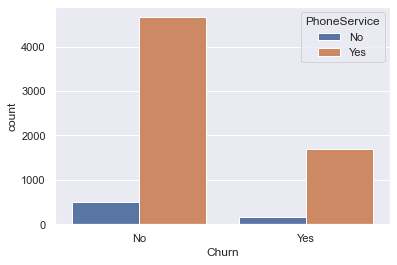

In [126]:
sns.countplot(df['Churn'], hue=df['PhoneService'])

<AxesSubplot:xlabel='Churn', ylabel='count'>

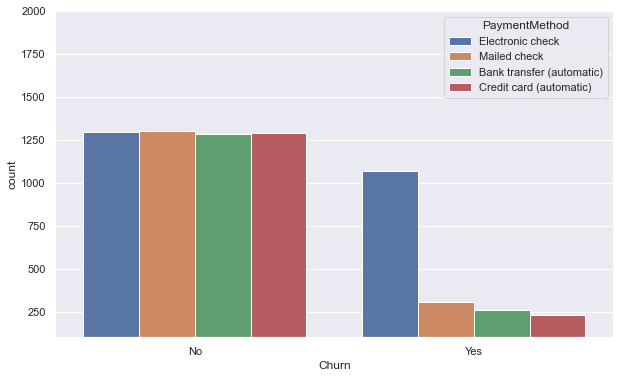

In [136]:
plt.figure(figsize=(10,6))
plt.ylim([100,2000])
sns.countplot(df['Churn'], hue=df['PaymentMethod'])

In [127]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.50,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [149]:
#Label Encoding and Binary Encoding

df2 = pd.get_dummies(data=df, columns=["PhoneService","Contract","PaperlessBilling","PaymentMethod","gender","SeniorCitizen","Partner","Dependents","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"], drop_first=False)

In [150]:
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,Yes,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Churn']=le.fit_transform(df2['Churn'])

In [153]:
df2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [272]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

x = df2.drop(['Churn','customerID'], axis=1)
y = df2['Churn']


In [273]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)


In [274]:
scaler = StandardScaler()
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
xTrain[cols] = scaler.fit_transform(xTrain[cols])

In [275]:
xTest[cols] = scaler.transform(xTest[cols])

In [276]:
xTest.head()

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
4543,0.350631,-1.515056,-0.659499,0,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4716,1.370978,0.065244,0.914660,0,1,0,0,1,1,0,...,1,1,0,0,1,0,0,1,0,0
3222,-1.241109,-0.668229,-0.962318,0,1,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2826,-0.792156,-0.704902,-0.750083,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
6675,0.146562,0.191934,0.095730,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1


In [277]:
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
y_pred = logreg.predict(xTest)

In [278]:
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))

[[1379  184]
 [ 243  307]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1563
           1       0.63      0.56      0.59       550

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [279]:
lg_reg = LogisticRegression()
rfe = RFE(lg_reg, 15)
rfe = rfe.fit(xTrain, yTrain)

In [280]:
rfe_df = pd.DataFrame({'columns': list(xTrain.columns), 'rank' : rfe.ranking_, 'support' : rfe.support_ }).sort_values(by='rank', ascending=True)
rfe_df

,columns,rank,support
0,tenure,1,True
37,TechSupport_No,1,True
31,OnlineBackup_No,1,True
28,OnlineSecurity_No,1,True
26,InternetService_Fiber optic,1,True
25,InternetService_DSL,1,True
23,MultipleLines_No phone service,1,True
16,SeniorCitizen_0,1,True
12,PaymentMethod_Electronic check,1,True
22,MultipleLines_No,1,True


In [281]:
rfe_columns = xTrain.columns[rfe.support_]
rfe_columns

Index(['tenure', 'TotalCharges', 'Contract_Month-to-month',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check', 'SeniorCitizen_0', 'MultipleLines_No',
       'MultipleLines_No phone service', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_No', 'StreamingMovies_Yes'],
      dtype='object')

In [282]:
cols1 = ['tenure', 'TotalCharges', 'Contract_Month-to-month',
       'Contract_Two year', 'PaperlessBilling_No',
       'PaymentMethod_Electronic check', 'SeniorCitizen_0', 'MultipleLines_No',
       'MultipleLines_No phone service', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_No', 'StreamingMovies_Yes']

In [283]:
xTrain = xTrain[cols1]

In [284]:
xTest = xTest[cols1]

In [285]:
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)
y_pred = logreg.predict(xTest)

In [286]:
print(confusion_matrix(yTest, y_pred))
print(classification_report(yTest, y_pred))

[[1386  177]
 [ 241  309]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1563
           1       0.64      0.56      0.60       550

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



In [268]:
df5 = pd.DataFrame({'Actual':yTest, 'Predicted':y_pred})

In [270]:
df5.head(20)

,Actual,Predicted
4543,0,0
4716,0,0
3222,0,0
2826,0,0
6675,0,0
4445,0,0
2232,0,0
5838,0,0
1278,0,0
578,0,1
